<a href="https://colab.research.google.com/github/ahmdbnrsl/From-Python-to-ML/blob/main/DEEP_LEARNING/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy

In [ ]:
import numpy as np

# Input x berdimensi 3
x = np.array([1.0, -0.5, 2.0])

# Layer 1: 4 neuron hidden
W0 = np.random.randn(4, 3)
b0 = np.random.randn(4)
print(W0)
print(b0)

# Aktivasi
def relu(z):
    result = np.maximum(0, z)
    print(result)
    return result

# Layer 2: output neuron
W1 = np.random.randn(1, 4)
b1 = np.random.randn(1)

# Komputasi: Φ(x) = T1(σ(T0(x)))
z0 = W0 @ x + b0
print(x)          # T0(x)
a0 = relu(z0)             # σ
z1 = W1 @ a0 + b1         # T1
Phi_x = z1

print("Output Φ(x):", Phi_x)

[[-0.14226861  0.03218374  0.15325728]
 [ 1.11140483 -1.13766403 -1.22051775]
 [-0.52564745  0.74273405 -1.053749  ]
 [ 3.81941241  1.12807535  0.782141  ]]
[ 0.96196606 -0.81696822 -0.11541851  0.65314665]
[ 1.  -0.5  2. ]
[1.11012013 0.         0.         5.47280338]
Output Φ(x): [-3.75636183]


In [ ]:
import numpy as np

# Fungsi aktivasi ReLU
def relu(x):
    return np.maximum(0, x)

# Input x ∈ R^6
x = np.random.randn(6)

# Bobot dan bias untuk layer pertama (T0)
W0 = np.random.randn(3, 6)  # 3 neuron, input 6
b0 = np.random.randn(3)

# Bobot dan bias untuk layer kedua (T1)
W1 = np.random.randn(2, 3)  # 2 output, 3 hidden neuron
b1 = np.random.randn(2)

# Forward pass
z0 = W0 @ x + b0        # Linear: T0(x)
h = relu(z0)            # Aktivasi: σ
z1 = W1 @ h + b1        # Linear: T1(h)
phi_x = z1              # Output akhir: Φ(x)

# Tampilkan hasil
print("Input x:", x)
print("Hidden activations (ReLU):", h)
print("Output Φ(x):", phi_x)

Input x: [-0.28963866  0.7943598  -1.3579998  -0.01547925 -1.19580445 -0.02618481]
Hidden activations (ReLU): [0.        0.2745708 0.       ]
Output Φ(x): [0.65000194 0.3546503 ]


In [ ]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.shape[0]

np.random.seed(0)
m, d, k = 100, 6, 2
X = np.random.randn(m, d)
Y = np.random.randn(m, k)

hidden_size = 3
W0 = np.random.randn(d, hidden_size) * 0.1
b0 = np.zeros((1, hidden_size))
W1 = np.random.randn(hidden_size, k) * 0.1
b1 = np.zeros((1, k))

lr = 0.01
epochs = 500

for epoch in range(epochs):
    Z1 = X @ W0 + b0
    A1 = relu(Z1)
    Z2 = A1 @ W1 + b1
    Y_pred = Z2

    loss = mse(Y, Y_pred)

    dZ2 = mse_derivative(Y, Y_pred)
    dW1 = A1.T @ dZ2
    db1 = np.sum(dZ2, axis=0, keepdims=True)
    dA1 = dZ2 @ W1.T
    dZ1 = dA1 * relu_derivative(Z1)
    dW0 = X.T @ dZ1
    db0 = np.sum(dZ1, axis=0, keepdims=True)

    W1 -= lr * dW1
    b1 -= lr * db1
    W0 -= lr * dW0
    b0 -= lr * db0

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.9603
Epoch 50, Loss: 0.9454
Epoch 100, Loss: 0.9422
Epoch 150, Loss: 0.9400
Epoch 200, Loss: 0.9379
Epoch 250, Loss: 0.9354
Epoch 300, Loss: 0.9324
Epoch 350, Loss: 0.9287
Epoch 400, Loss: 0.9245
Epoch 450, Loss: 0.9197


In [ ]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

np.random.seed(0)
m, d, k = 100, 6, 2
X = np.random.randn(m, d)
Y = np.random.randn(m, k)

hidden_size = 4
W0 = np.random.randn(d, hidden_size) * 0.1
b0 = np.zeros((1, hidden_size))
W1 = np.random.randn(hidden_size, k) * 0.1
b1 = np.zeros((1, k))

Z1 = X @ W0 + b0
A1 = relu(Z1)
Z2 = A1 @ W1 + b1
Y_pred = Z2

empirical_risk = mse(Y, Y_pred)
print("Empirical Risk (MSE):", empirical_risk)

Empirical Risk (MSE): 0.9702897369235239


In [ ]:
pip install matplotlib

X : [[ 4.96714153e-01 -1.38264301e-01  6.47688538e-01  1.52302986e+00
  -2.34153375e-01]
 [-2.34136957e-01  1.57921282e+00  7.67434729e-01 -4.69474386e-01
   5.42560044e-01]
 [-4.63417693e-01 -4.65729754e-01  2.41962272e-01 -1.91328024e+00
  -1.72491783e+00]
 [-5.62287529e-01 -1.01283112e+00  3.14247333e-01 -9.08024076e-01
  -1.41230370e+00]
 [ 1.46564877e+00 -2.25776300e-01  6.75282047e-02 -1.42474819e+00
  -5.44382725e-01]
 [ 1.10922590e-01 -1.15099358e+00  3.75698018e-01 -6.00638690e-01
  -2.91693750e-01]
 [-6.01706612e-01  1.85227818e+00 -1.34972247e-02 -1.05771093e+00
   8.22544912e-01]
 [-1.22084365e+00  2.08863595e-01 -1.95967012e+00 -1.32818605e+00
   1.96861236e-01]
 [ 7.38466580e-01  1.71368281e-01 -1.15648282e-01 -3.01103696e-01
  -1.47852199e+00]
 [-7.19844208e-01 -4.60638771e-01  1.05712223e+00  3.43618290e-01
  -1.76304016e+00]
 [ 3.24083969e-01 -3.85082280e-01 -6.76922000e-01  6.11676289e-01
   1.03099952e+00]
 [ 9.31280119e-01 -8.39217523e-01 -3.09212376e-01  3.31263431

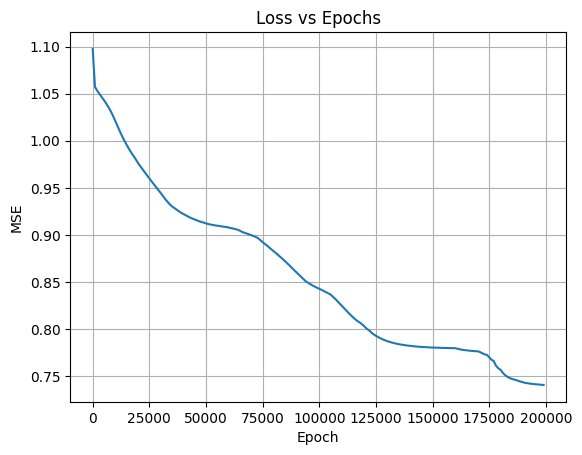

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x): return np.maximum(0, x)
def relu_derivative(x): return (x > 0).astype(float)
def mse(y_true, y_pred): return np.mean((y_true - y_pred) ** 2)
def mse_derivative(y_true, y_pred): return 2 * (y_pred - y_true) / y_true.shape[0]

np.random.seed(42)
m, d, k = 200, 5, 1
X = np.random.randn(m, d)
Y = np.random.randn(m, k)

hidden_size = 8
W0 = np.random.randn(d, hidden_size) * 0.1
b0 = np.zeros((1, hidden_size))
W1 = np.random.randn(hidden_size, k) * 0.1
b1 = np.zeros((1, k))

print(f"X : {X}\nY: {Y}\nW0 : {W0}\nb0 : {b0}\nW1: {W1}\nb1: {b1}")

lr = 0.001
epochs = 200_000
losses = []

for epoch in range(epochs):
    Z1 = X @ W0 + b0
    A1 = relu(Z1)
    Z2 = A1 @ W1 + b1
    Y_pred = Z2

    loss = mse(Y, Y_pred)

    if epoch % 1000 == 0:
        losses.append(loss)
    if epoch % 10000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

    dZ2 = mse_derivative(Y, Y_pred)
    dW1 = A1.T @ dZ2
    db1 = np.sum(dZ2, axis=0, keepdims=True)
    dA1 = dZ2 @ W1.T
    dZ1 = dA1 * relu_derivative(Z1)
    dW0 = X.T @ dZ1
    db0 = np.sum(dZ1, axis=0, keepdims=True)

    W1 -= lr * dW1
    b1 -= lr * db1
    W0 -= lr * dW0
    b0 -= lr * db0

print(f"Final Loss: {loss:.6f}")

plt.plot(np.arange(0, epochs, 1000), losses)
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Dataset
np.random.seed(42)
num_samples = 100
input_dim = 4
output_dim = 1

X_train = np.random.randn(num_samples, input_dim)
true_weights = np.array([[2.0], [-3.0], [0.5], [1.0]])
true_bias = 0.7
Y_train = X_train @ true_weights + true_bias + 0.1 * np.random.randn(num_samples, 1)

# Parameter Inisialisasi
num_hidden_units = 10
weights_input_hidden = np.random.randn(input_dim, num_hidden_units) * 0.1
bias_hidden = np.zeros((1, num_hidden_units))
weights_hidden_output = np.random.randn(num_hidden_units, output_dim) * 0.1
bias_output = np.zeros((1, output_dim))

# Fungsi Aktivasi
def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return (x > 0).astype(float)

# Loss dan Turunan
def mean_squared_error(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def mse_grad(y_pred, y_true):
    return 2 * (y_pred - y_true) / y_true.shape[0]

# Training Loop
learning_rate = 0.01
epochs = 10000
training_losses = []

for epoch in range(epochs):
    # Forward pass
    hidden_input = X_train @ weights_input_hidden + bias_hidden
    hidden_output = relu(hidden_input)
    final_output = hidden_output @ weights_hidden_output + bias_output
    predictions = final_output

    # Loss
    loss = mean_squared_error(predictions, Y_train)
    training_losses.append(loss)

    # Backward pass
    grad_loss_output = mse_grad(predictions, Y_train)
    grad_weights_hidden_output = hidden_output.T @ grad_loss_output
    grad_bias_output = np.sum(grad_loss_output, axis=0, keepdims=True)

    grad_hidden_output = grad_loss_output @ weights_hidden_output.T
    grad_hidden_input = grad_hidden_output * relu_grad(hidden_input)
    grad_weights_input_hidden = X_train.T @ grad_hidden_input
    grad_bias_hidden = np.sum(grad_hidden_input, axis=0, keepdims=True)

    # Update weights and biases
    weights_hidden_output -= learning_rate * grad_weights_hidden_output
    bias_output -= learning_rate * grad_bias_output
    weights_input_hidden -= learning_rate * grad_weights_input_hidden
    bias_hidden -= learning_rate * grad_bias_hidden

training_losses[-1], predictions[:5], Y_train[:5]

(np.float64(0.008196058438414342),
 array([[ 3.90350961],
        [ 2.46625542],
        [-2.6352913 ],
        [ 5.52972836],
        [-4.12802462]]),
 array([[ 3.79565257],
        [ 2.43120776],
        [-2.56354313],
        [ 5.50371689],
        [-4.17972652]]))

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
import math
import numpy as np

def softmax(z):
    exp_z = [math.exp(i) for i in z]
    sum_exp_z = sum(exp_z)
    softmax_output = [i / sum_exp_z for i in exp_z]
    return softmax_output


vector = np.array([1, 2, 3])
softmax(vector)

[0.09003057317038046, 0.24472847105479767, 0.6652409557748219]

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter alpha untuk PReLU
a = 0.1

# ReLU function
def relu(x):
    return np.maximum(0, x)

# PReLU function
def prelu(x, a):
    return np.where(x > 0, x, a * x)

# Approximated PReLU using only ReLU
def approx_prelu_using_relu(x, a):
    return relu(x) - a * relu(-x)

def approx_relu_using_prelu(x, a):
    return 1/(1-a) * (prelu(x, a) - a*x)

# Sample input
x = np.linspace(-10, 10, 20)

# Compute outputs
y_true = relu(x)
y_approx = approx_relu_using_prelu(x, a)

print(y_true)
print(y_approx)

print(approx_relu_using_prelu(2, a))
print(relu(2))
print(prelu(-2, a))
approx_prelu_using_relu(-2, a)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.52631579  1.57894737
  2.63157895  3.68421053  4.73684211  5.78947368  6.84210526  7.89473684
  8.94736842 10.        ]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.52631579  1.57894737
  2.63157895  3.68421053  4.73684211  5.78947368  6.84210526  7.89473684
  8.94736842 10.        ]
2.0
2
-0.2


np.float64(-0.2)